# Introduction

## 1. Getting started

In [10]:
import string
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_words():
    f = open("C:/Users/Anton/Desktop/used.txt", "r")
    words = {e.strip().lower() for e in f.readlines()}
    f.close()
    return words

In [4]:

def filter_words(words, incorrect, false_loc, correct_loc, duplicates):
    """
    

    Parameters
    ----------
    words : TYPE
        DESCRIPTION.
    incorrect : TYPE
        DESCRIPTION.
    false_loc : TYPE
        DESCRIPTION.
    correct_loc : TYPE
        DESCRIPTION.
    duplicates : TYPE
        DESCRIPTION.

    Returns
    -------
    updated_words : TYPE
        DESCRIPTION.

    """
    updated_words = words.copy()
    for word in words:
        removed = False
        for wrong_letter in incorrect:
            if wrong_letter in word:
                updated_words.remove(word)
                removed = True
                break
                
                
        if not removed:
            for letter, pos in false_loc:
                    if word[pos] == letter or letter not in word:
                        updated_words.remove(word)
                        removed = True
                        break
                    
                
                        
            if not removed:
                for letter, pos in correct_loc:
                    if word[pos] != letter:
                        updated_words.remove(word)
                        removed = True
                        break
            
            if not removed:
                    for letter in duplicates:
                        if letter[1] != word.count(letter[0]):
                            updated_words.remove(word)
                            removed = True
                            break

        
                    
    return updated_words

## 2. Probability distributions

In [5]:
def generate_probabilities(words):
    """
    Takes as input a list of words, and outputs a probability distribution for
    the words based on the frequency of occurence of the letters
    

    Parameters
    ----------
    words : list
        list of words to generate a probability distribution from.

    Returns
    -------
    word_probs : dict
        {'word': (prob, nb_of_unique_letters)}

    """
    
    
    letters = {e: 0 for e in list(string.ascii_lowercase)}
    for word in words:
        for char in word:
            letters[char] += 1
            
            
    letter_probs = {e: letters[e] / len(words) for e in letters}
    
    word_probs = {"test": (0,0)}
    m = "test"
    for word in words:
        word_prob = 1
        for char in word:
            word_prob *= letter_probs[char]
        word_probs[word] = (word_prob, len(set(word)))
        if word_prob > word_probs[m][0]:
            m = word

    updated = {}
    for e in word_probs:
        if word_probs[e][1] == 5:
            updated[e] = word_probs[e]

    j = "test"
    for e in updated:
        if word_probs[e][0] > word_probs[j][0]:
            j = e
        
    return word_probs

### a. Max occurence, no uniqueness

In [6]:
def get_max_probability(pd, words):
    """
    Takes a list of words and probability distribution, and outputs the word
    with the highest probability of occurence

    Parameters
    ----------
    pd : dict
        Probability distribution of words
    words : list
        List of words

    Returns
    -------
    max_prob : float
        The highest probability of occurence
    max_word : string
        The word that has the highes probability of occurence

    """
    
    max_prob = 0
    max_word = ""
    for w in words:
        if pd[w][0] > max_prob:
            max_prob = pd[w][0]
            max_word = w
            
    return max_word, max_prob

#### Automation code


In [7]:
def get_result(guess, correct_word):
    incorrect = []
    false_loc = []
    correct_loc = []
    duplicates = []
    
    to_be_checked = {}
    
    for pos, char in enumerate(guess):
        if char not in correct_word:
            incorrect.append(char)
            
        elif guess.count(char) == correct_word.count(char):
            if correct_word[pos] == char:
                correct_loc.append((char, pos))
            else:
                false_loc.append((char, pos))
        else:
            if char not in to_be_checked:
                to_be_checked[char] = [pos]
            else:
                to_be_checked[char].append(pos)
            
            
            

    for char in to_be_checked:
        correct_count = 0
        left = []
        has_duplicates = False
        for pos in to_be_checked[char]:
            
            if correct_word[pos] == char:
                correct_loc.append((char, pos))
                correct_count += 1
            else:
                left.append(pos)

        for other in left:
            if correct_count != correct_word.count(char):
                false_loc.append((char, other))
                correct_count += 1
            else:
                has_duplicates = True
                
            
        if has_duplicates:
           duplicates.append((char, correct_count))
        


    return incorrect, false_loc, correct_loc, duplicates

Now, we need a function to iterate through the different tries to get one word.

In [13]:
def run_iters(answer, pd_function, threshold=6):
    probs = generate_probabilities(load_words())
    
    ##add the first one to the iters list
    iters = []
    word = "alert"
    set1 = load_words()
    prob = 1
    prev_word = ""
    


    while len(iters) <= 5 and prev_word != word:
        iters.append((word, prob))
        prev_word = word
        set1 = filter_words(set1, *get_result(word, answer))
        
        if pd_function == "max":
            word, prob = get_max_probability(probs, set1)
        elif pd_function == "max_unique":
            if len(iters) < threshold:
                word, prob = get_max_probability_uniqueness(probs, set1)
            else:
                word, prob = get_max_probability(probs, set1)          
        
    if prev_word != word:
        iters.append("WRONG")
        iters.append(answer)
        iters.append(answer in pd_function)


    return iters

#### Simulation

In [11]:
s = []
count = 0
without_wrong = []
overall = []
wrong = 0
words = load_words()
wrongs = []

for word in words:
    count += 1
    
    if count % 100 == 0:
        print(count / len(words) * 100, "% done")
        
    l = run_iters(word, "max")
    if "WRONG" in l:
        wrong += 1
        count -= 1
        wrongs.append(l)
    else:
        without_wrong.append(len(l))
    
    s.append(len(l))
    
    overall.append(l)

4.330879168471199 % done
8.661758336942398 % done
12.9926375054136 % done
17.323516673884797 % done
21.654395842355996 % done
25.9852750108272 % done
30.316154179298398 % done
34.64703334776959 % done
34.64703334776959 % done
38.9779125162408 % done
43.30879168471199 % done
47.6396708531832 % done
51.9705500216544 % done
56.301429190125596 % done
60.632308358596795 % done
64.96318752706799 % done
69.29406669553919 % done
73.6249458640104 % done
77.9558250324816 % done
82.2867042009528 % done
86.61758336942398 % done
90.9484625378952 % done
95.2793417063664 % done


Visualize:

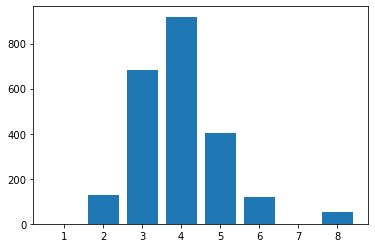

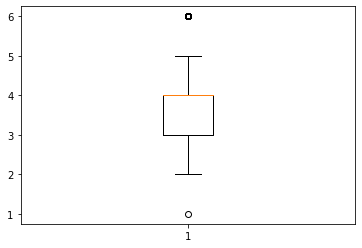

Min:  1
Max:  8
Mean:  3.962754439151148
Std:  1.1312324368717666
Median:  4.0


In [12]:
plt.bar(list(set(s)), [s.count(e) for e in list(set(s))])
plt.show()

plt.boxplot(without_wrong)
plt.show()

converted = np.array(s)
    
print("Min: ", np.min(converted))
print("Max: ", np.max(converted))
print("Mean: ", np.mean(converted))
print("Std: ", np.std(converted))
print("Median: ", np.median(converted))

### b. Uniqueness

In [14]:
def get_max_probability_uniqueness(pd, words):
    """
    Takes a list of words and probability distribution, and outputs the word
    with the highest probability of occurence that also has highest uniqye

    Parameters
    ----------
    pd : dict
        Probability distribution of words
    words : list
        List of words

    Returns
    -------
    max_prob : float
        The highest probability of occurence
    max_word : string
        The word that has the highes probability of occurence
    """

    max_unique = max([pd[e][1] for e in pd if e in words])
    subset = {e: pd[e] for e in pd if pd[e][1] == max_unique}
    
    max_prob = 0
    max_word = ""
    for w in words:
        if w in subset and subset[w][0] > max_prob:
            max_prob = subset[w][0]
            max_word = w
            
    return max_word, max_prob

Nb of iterations = 1:

21.654395842355996 % done
43.30879168471199 % done
64.96318752706799 % done
86.61758336942398 % done


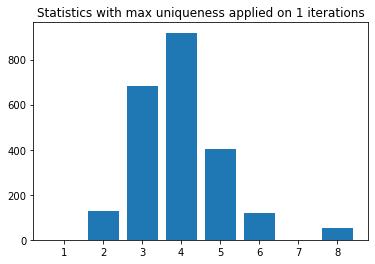

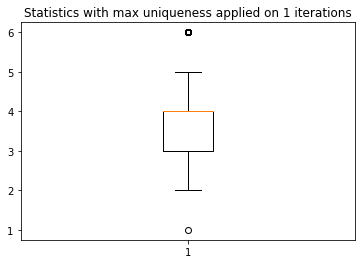

Min:  1
Max:  8
Mean:  3.962754439151148
Std:  1.1312324368717666
Median:  4.0 


Nb of iterations = 2:

21.654395842355996 % done
43.30879168471199 % done
64.96318752706799 % done
86.61758336942398 % done


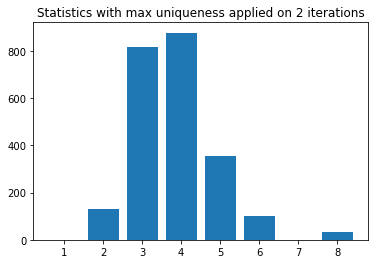

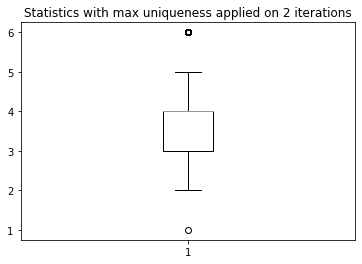

Min:  1
Max:  8
Mean:  3.8284971849285405
Std:  1.0488470200938997
Median:  4.0 


Nb of iterations = 3:

21.654395842355996 % done
43.30879168471199 % done
64.96318752706799 % done
86.61758336942398 % done
86.61758336942398 % done


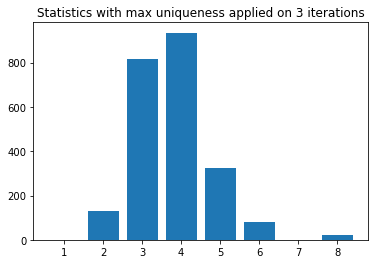

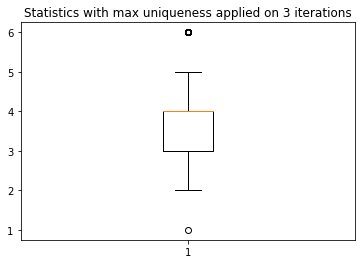

Min:  1
Max:  8
Mean:  3.78345604157644
Std:  0.9875202265419472
Median:  4.0 


Nb of iterations = 4:

21.654395842355996 % done
43.30879168471199 % done
64.96318752706799 % done
86.61758336942398 % done


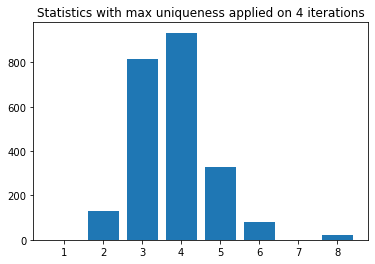

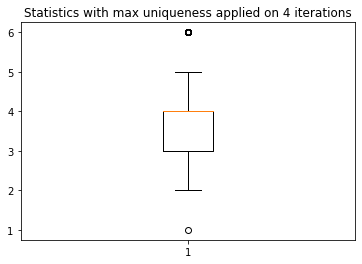

Min:  1
Max:  8
Mean:  3.7812906019922043
Std:  0.980660049861166
Median:  4.0 


Nb of iterations = 5:

21.654395842355996 % done
43.30879168471199 % done
64.96318752706799 % done
86.61758336942398 % done


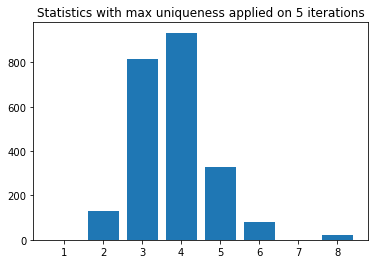

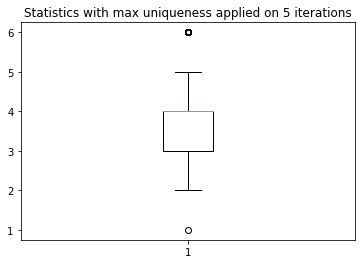

Min:  1
Max:  8
Mean:  3.782156777825899
Std:  0.9834985102813361
Median:  4.0 


Nb of iterations = 6:

21.654395842355996 % done
43.30879168471199 % done
64.96318752706799 % done
86.61758336942398 % done
86.61758336942398 % done


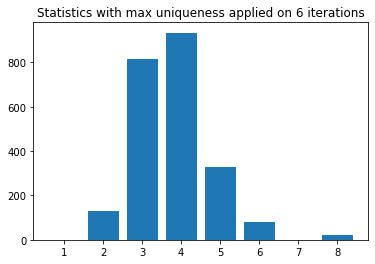

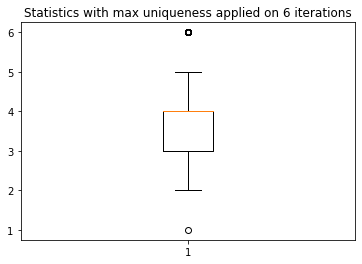

Min:  1
Max:  8
Mean:  3.782156777825899
Std:  0.9834985102813361
Median:  4.0 




In [24]:
for i in range(1, 7):
    print(f"Nb of iterations = {i}:\n")
    
    s = []
    count = 0
    without_wrong = []
    overall = []
    wrong = 0
    words = load_words()
    wrongs = []

    for word in words:
        count += 1

        if count % 500 == 0:
            print(count / len(words) * 100, "% done")


        l = run_iters(word, "max_unique", i)
        if "WRONG" in l:
            wrong += 1
            count -= 1
            wrongs.append(l)
        else:
            without_wrong.append(len(l))

        s.append(len(l))

        overall.append(l)

    plt.bar(list(set(s)), [s.count(e) for e in list(set(s))])
    plt.title(f"Statistics with max uniqueness applied on {i} iterations")
    plt.show()

    plt.boxplot(without_wrong)
    plt.title(f"Statistics with max uniqueness applied on {i} iterations")
    plt.show()

    converted = np.array(s)

    print("Min: ", np.min(converted))
    print("Max: ", np.max(converted))
    print("Mean: ", np.mean(converted))
    print("Std: ", np.std(converted))
    print("Median: ", np.median(converted), "\n\n")
    

### c. Entropy Approach: